# K-means clustering: Customer segmentation

The following example helps you understand the use of k-means clustering in market segmentation. 

Assume that you are working are working for a bank and you have gathered relevant customer data in a file called customer_segmentation.csv (taken from Kaggle and modified). The dataset has the following columns:

- Customer Id: ID of the customer
- Age: Age of the customer
- Edu: Education level of the customer
- Income: Annual income in thousands of dollars

Given the data, you are being asked what kind of products (could be policies, loans, investment strategies etc.) the bank should develop. Some questions that they ask you specifically could be: should we develop one investment product for all our customers? Or should we develop different ones for different sets of customers? In order to answer such questions, you take on the task of k-means clustering to find different groups of customers that then the bank can deal with independently.

Here's a template that assigns several tasks for you and also provides a roadmap to guide you. Please note, you are free to follow your own coding style and name the variables the way you like.

## 1. Import the relevant libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 2. Load the data

In [2]:
raw_data = pd.read_csv('customer_segmentation.csv')
raw_data.head()

,Customer Id,Age,Edu,Income
0,1,41,2,19
1,2,47,1,100
2,3,33,2,57
3,4,29,2,19
4,5,47,1,253


## 3. Explore the descriptive statistics

In [3]:
raw_data.describe(include='all')

,Customer Id,Age,Edu,Income
count,850.00000,850.000000,850.000000,850.000000
mean,425.50000,35.029412,1.710588,46.675294
std,245.51816,8.041432,0.927784,38.543054
min,1.00000,20.000000,1.000000,13.000000
25%,213.25000,29.000000,1.000000,24.000000
50%,425.50000,34.000000,1.000000,35.000000
75%,637.75000,41.000000,2.000000,55.750000
max,850.00000,56.000000,5.000000,446.000000


## 4. Data preprocessing

If necessary, we carry out preprocessing here. However, in this example, we don't need to do this. So, we can proceed ahead.

## 5. Perform K-means clustering 

### 5.1 Declare the inputs 

In [4]:
inputs  = raw_data.drop(['Customer Id'], axis=1)

### 5.2 Feature scaling

Feature scaling is an important aspect of k-means clustering. Since k-means algorithm is based on euclidean distances between different features, the disparity in magnitudes amongst the features can lead to less meaningful clusters. So, feature scaling is generally performed prior to running a k-means algorithm.

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [6]:
inputs_scaled = scaler.transform(inputs)

In [7]:
inputs_scaled

array([[ 0.74291541,  0.31212243, -0.71845859],
       [ 1.48949049, -0.76634938,  1.38432469],
       [-0.25251804,  0.31212243,  0.26803233],
       ...,
       [-1.24795149,  2.46906604, -0.74441888],
       [-0.37694723, -0.76634938, -0.484816  ],
       [ 2.1116364 , -0.76634938,  0.44975434]])

### 5.3 Build the k-means model and find out the optimal number of clusters based on the elbow method

In [8]:
from sklearn.cluster import KMeans

nmin = 1 # minimum no of clusters you would like to investigate
nmax = 12 # maximum no of clusters you would like to investigate

wcss = [] # List to store the Within-Cluster-Sum-of-Squares metric for each iteration

for i in range(nmin,nmax):
    kmeans = KMeans(i)
    kmeans.fit(inputs_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [9]:
wcss

[2549.999999999995,
 1755.5537123689405,
 1313.614864130915,
 962.7835827953278,
 819.6992775591852,
 708.0989752454115,
 621.1666690842035,
 541.8361565936507,
 477.10301329850057,
 436.7911062030137,
 406.6884648169242]

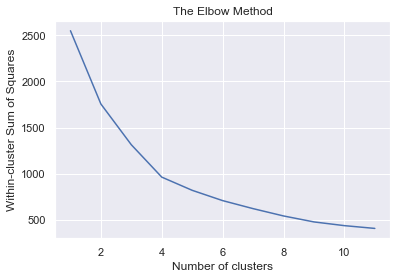

In [10]:
# Elbow method

number_clusters = range(nmin,nmax)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

What value of "number of clusters" would you choose based on the elbow method?

### 5.4 Clustering results based on the "optimal number of clusters" chosen from the elbow method

In [11]:
kmeans = KMeans(4)
kmeans.fit(inputs_scaled)

KMeans(n_clusters=4)

In [12]:
identified_clusters = kmeans.predict(inputs_scaled)
identified_clusters

array([2, 2, 0, 0, 1, 2, 2, 3, 0, 1, 3, 0, 0, 2, 3, 0, 0, 3, 2, 0, 0, 3,
       3, 2, 1, 2, 0, 2, 2, 0, 3, 2, 0, 3, 0, 0, 3, 0, 0, 1, 0, 1, 0, 1,
       2, 3, 0, 0, 0, 0, 2, 2, 0, 2, 3, 0, 0, 3, 2, 2, 2, 0, 2, 2, 0, 0,
       2, 0, 2, 0, 3, 3, 0, 0, 0, 0, 2, 0, 1, 2, 0, 3, 1, 2, 2, 0, 3, 0,
       0, 3, 2, 0, 0, 0, 3, 2, 2, 2, 0, 3, 0, 1, 2, 2, 0, 2, 2, 0, 0, 3,
       2, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 2, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 3, 0, 3, 2, 0, 2, 2, 2, 0, 0, 0, 2, 3, 2, 3, 0, 0, 0, 2, 3, 2,
       2, 0, 2, 2, 0, 3, 0, 3, 2, 0, 0, 3, 3, 0, 0, 3, 2, 0, 3, 3, 0, 2,
       2, 0, 0, 2, 2, 0, 0, 1, 3, 0, 2, 2, 2, 3, 0, 2, 3, 2, 2, 3, 0, 2,
       1, 3, 2, 2, 3, 2, 2, 2, 0, 1, 2, 3, 0, 0, 2, 3, 2, 0, 2, 3, 2, 2,
       0, 1, 0, 3, 0, 0, 1, 0, 3, 2, 2, 0, 0, 0, 2, 0, 2, 0, 3, 0, 0, 2,
       0, 0, 2, 1, 2, 2, 3, 3, 0, 3, 2, 0, 1, 0, 2, 0, 0, 0, 2, 3, 0, 3,
       2, 2, 0, 3, 2, 2, 0, 0, 0, 2, 2, 0, 0, 3, 0, 0, 0, 1, 2, 0, 2, 0,
       2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 3, 2, 2,

In [13]:
data_with_clusters = raw_data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters.head(10)

,Customer Id,Age,Edu,Income,Cluster
0,1,41,2,19,2
1,2,47,1,100,2
2,3,33,2,57,0
3,4,29,2,19,0
4,5,47,1,253,1
5,6,40,1,81,2
6,7,38,2,56,2
7,8,42,3,64,3
8,9,26,1,18,0
9,10,47,3,115,1


<IPython.core.display.Javascript object>


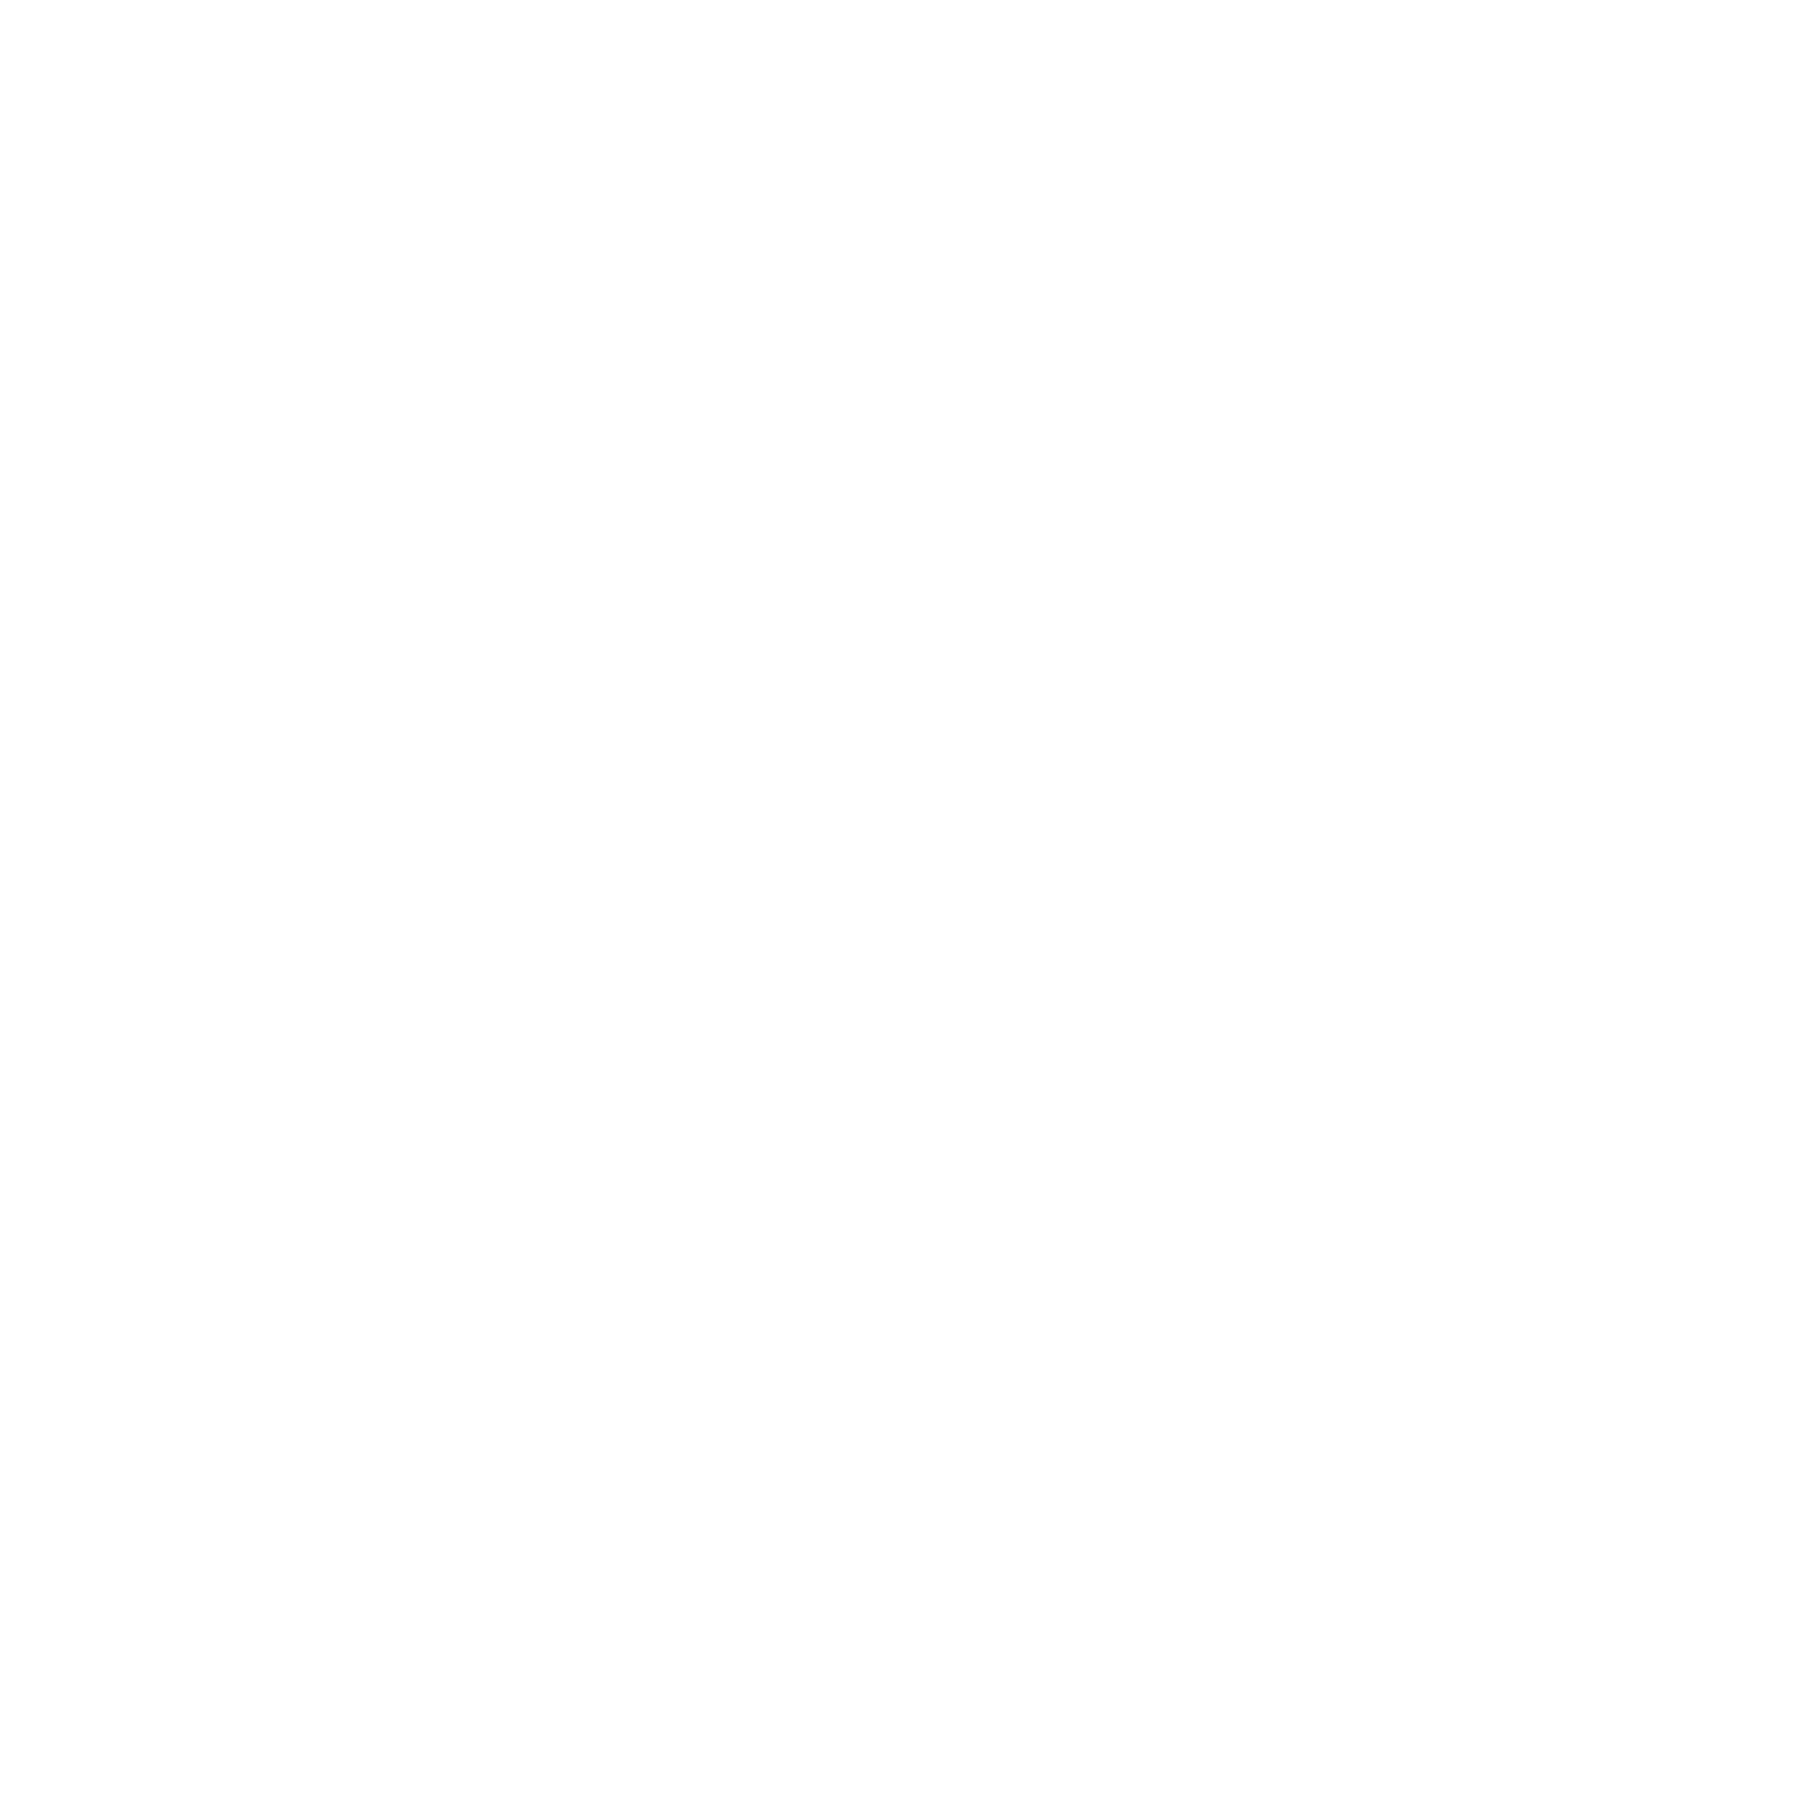

In [14]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize =(9, 9))
ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 48, 
            azim = 134)

ax.scatter(data_with_clusters['Edu'], data_with_clusters['Age'], data_with_clusters['Income'], 
           c = data_with_clusters['Cluster'], 
           s = 200, 
           cmap = 'hot', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
ax.set_xlabel('Education', 
              fontsize = 16)
ax.set_ylabel('Age', 
              fontsize = 16)
ax.set_zlabel('Income', 
              fontsize = 16)

plt.show()

Based on the result above:
1. How do you think the groups can be named? 
2. How would you choose to develop products for these different groups?

- Group 1: Younger, lower education and lower income
- Group 2: Older, lower education and lower income
- Group 3: Higher education and lower income
- Group 4: Older and higher income

## 6. Regression following cluster analysis

Now that you have found out different customer groups (or segments), you can look at each of these groups separately and understand the data better within each group and make additional predictions to set up suitable products and pricing of the products.

In [15]:
# As an example, create a dataframe that contains data of the customers pertaining to cluster 0 alone.

data_reg = data_with_clusters[data_with_clusters['Cluster'] == 0]
data_reg.describe()

,Customer Id,Age,Edu,Income,Cluster
count,389.000000,389.000000,389.000000,389.000000,389.0
mean,435.251928,29.079692,1.349614,29.113111,0.0
std,245.850330,3.994368,0.477462,12.279291,0.0
min,3.000000,20.000000,1.000000,13.000000,0.0
25%,233.000000,26.000000,1.000000,20.000000,0.0
50%,437.000000,29.000000,1.000000,26.000000,0.0
75%,648.000000,32.000000,2.000000,35.000000,0.0
max,849.000000,37.000000,2.000000,98.000000,0.0


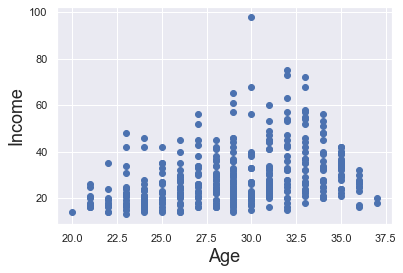

In [16]:
# Make a scatter plot of Age vs. Income of this customer segment

%matplotlib inline
plt.scatter(data_reg['Age'], data_reg['Income'])
plt.xlabel('Age',size=18)
plt.ylabel('Income',size=18)

plt.show()

Homework: You can build a multiple regression model on this particular customer segment and find out how income depends on Age and the level of education.

## K-means clustering: Image Compression and Segmentation

The following example helps you in understanding the use of k-means for image compression and segmentation.

In this case, we shall use one of the sample images available from sklearn, and see how image compression/segmentation can be achieved.

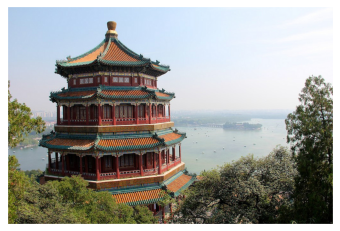

In [17]:
# pick a sample image from sklearn
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")

# plot the image
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

The image itself is stored in a three-dimensional array of size (height, width, RGB), containing red/blue/green contributions as integers from 0 to 255:

In [18]:
china.shape

(427, 640, 3)

This shows that the image has 427 $\times$ 640 pixels. Each pixel has a R/G/B value associated with it, hence the third dimension has a shape 3.

In [19]:
china[0,0,:]

array([174, 201, 231], dtype=uint8)

This shows that the one of the pixels (0,0) has a color with a R/G/B combination of 174, 201, 231.

One way we can view this set of pixels is as a cloud of points in a three-dimensional color space. We will reshape the data to [n_samples x n_features], and rescale the colors so that they lie between 0 and 1:

In [20]:
# Rescale the pixel data so that its values are in the range [0, 1]. Here such a simple scaling approach is enough
# since all the R/G/B values range between 0-255.

data = china/255

# Reshape the data so it's now 2D, with the first dimension of the reshaped data is equal to 427 x 640. 
# hint: you can use the np.reshape method

data = np.reshape(data, (data.shape[0]*data.shape[1], data.shape[2]))
data.shape

(273280, 3)

Let's look at the 3D plot in the R/G/B space by randomly picking 2000 pixels from 273280 pixels. We pick a smaller number to just give us an idea and make the plot without any memory issues.

<IPython.core.display.Javascript object>


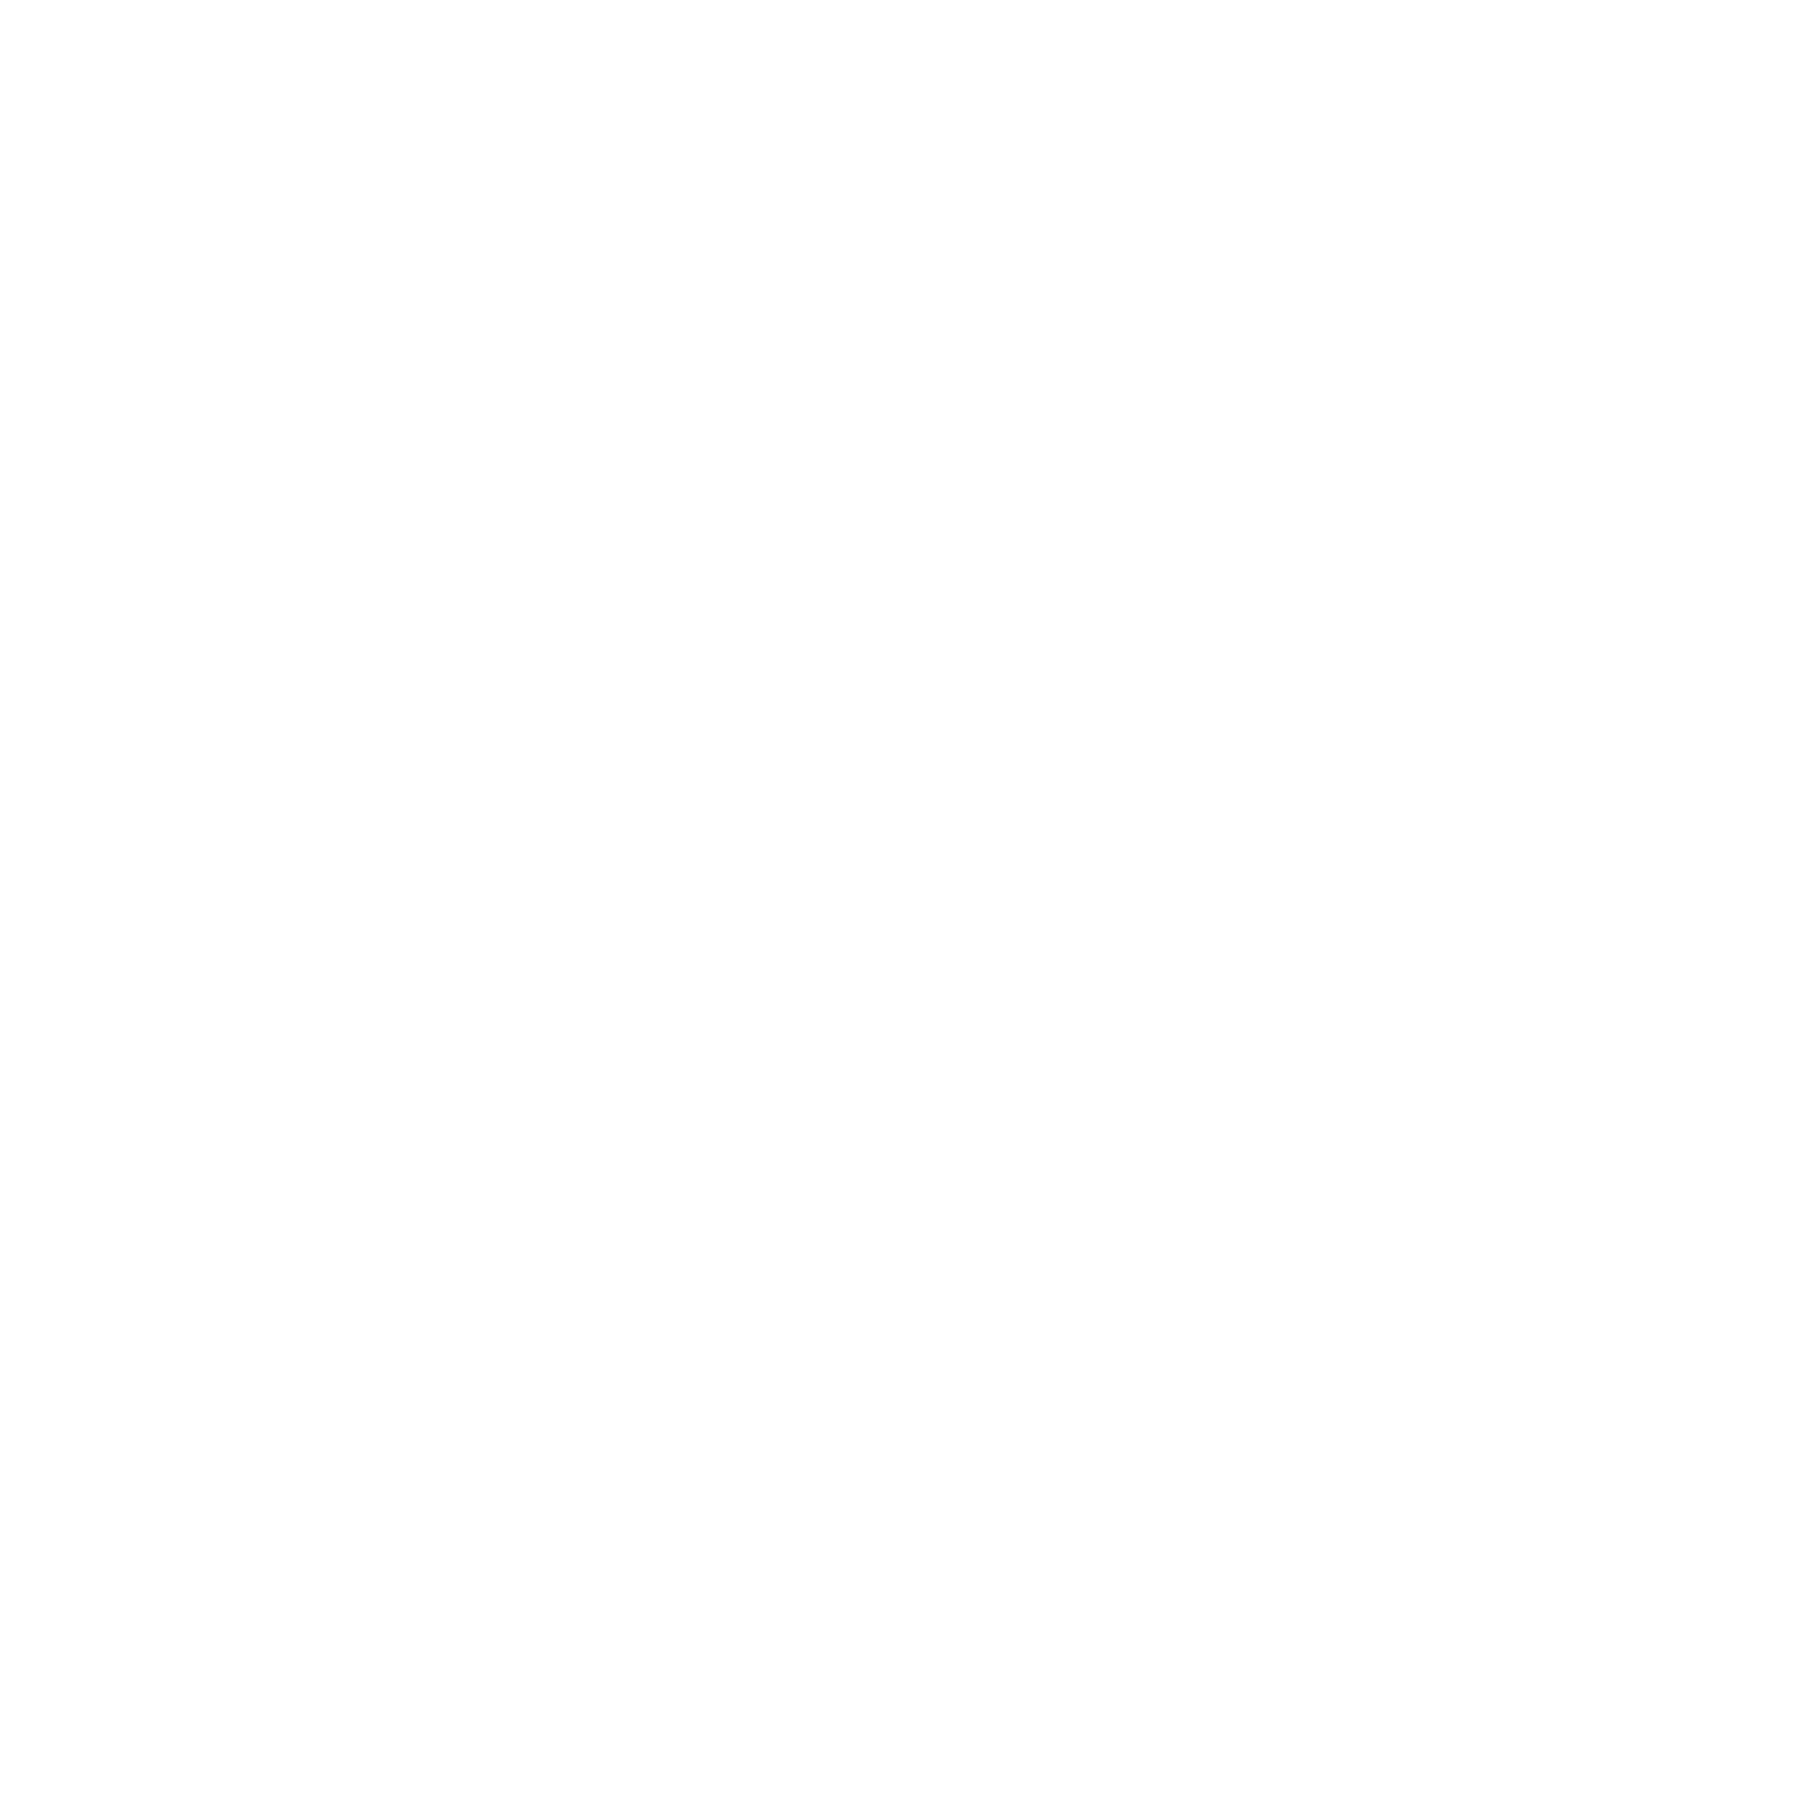

In [21]:
# Randomly select N row indices from data
N = 2000
i = np.random.randint(0, data.shape[0], N)

# Extract the colors associated with the randomly selected indices
plot_data = data[i, :]

%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize =(9, 9))
ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 48, 
            azim = 134)

ax.scatter(plot_data[:,0], plot_data[:,1], plot_data[:,2], 
           s = 200, 
           cmap = 'hot', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
ax.set_xlabel('Red', 
              fontsize = 16)
ax.set_ylabel('Green', 
              fontsize = 16)
ax.set_zlabel('Blue', 
              fontsize = 16)

plt.show()

In [22]:
# Instantiate a KMeans model with a certain number of clusters
kmeans = KMeans(n_clusters=4)

# Train the model on the data
kmeans.fit(data)

KMeans(n_clusters=4)

In [23]:
# Predict which cluster each point in the data belongs to 
# and find the color associated with the center of that cluster
identified_clusters = kmeans.predict(data)

# assign new colors to each pixel based on the centroid values
new_colors = kmeans.cluster_centers_[identified_clusters]
new_colors.shape

(273280, 3)

<IPython.core.display.Javascript object>


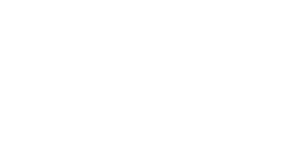

In [24]:
# Replot the RGB data, but now with clustering results.

# Randomly select N row indices from data
N = 2000
i = np.random.randint(0, data.shape[0], N)

# Extract the colors associated with the randomly selected indices
plot_data = data[i, :]
plot_clusters = identified_clusters[i]

%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize =(9, 9))
ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 48, 
            azim = 134)

ax.scatter(plot_data[:,0], plot_data[:,1], plot_data[:,2], 
           c = plot_clusters, 
           s = 200, 
           cmap = 'hot', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
ax.set_xlabel('Red', 
              fontsize = 16)
ax.set_ylabel('Green', 
              fontsize = 16)
ax.set_zlabel('Blue', 
              fontsize = 16)

plt.show()

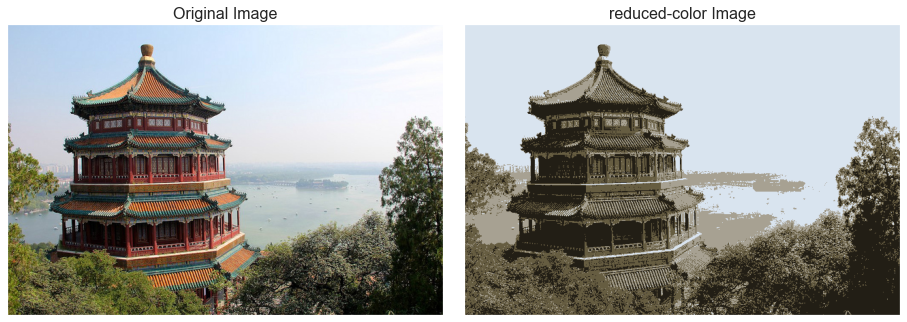

In [25]:
# Replot the image and compare with the original one
china_recolored = new_colors.reshape(china.shape)

%matplotlib inline
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('reduced-color Image', size=16);

What do you observe? 